In [1]:
#import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
titanic = pd.read_csv('data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


C:\Users\rache\AppData\Local\Temp\ipykernel_24096\223746693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), cmap="YlGnBu")


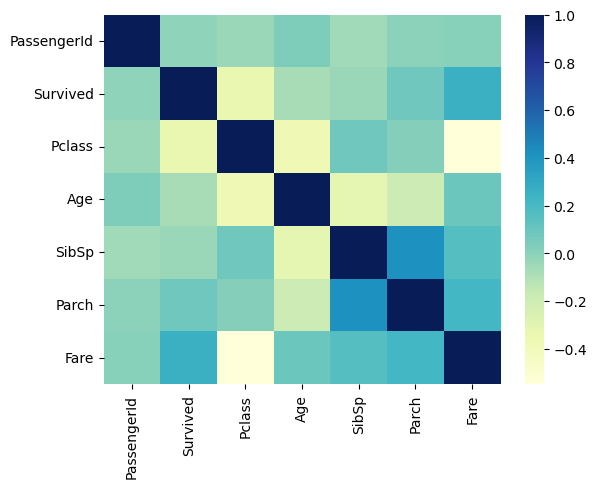

In [4]:
# corrlection to survival using heat map
sns.heatmap(titanic.corr(), cmap="YlGnBu")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

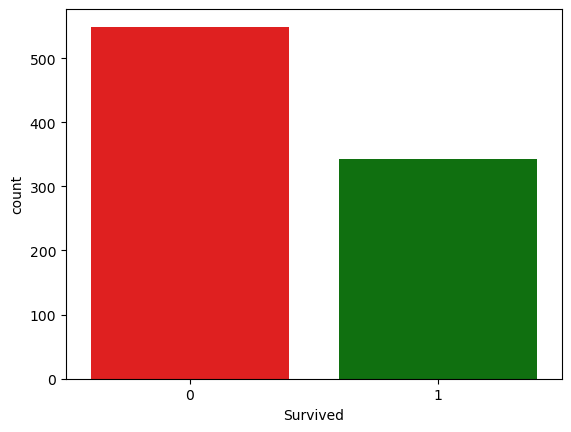

In [5]:
# How many survived 1 did not survive 0
sns.countplot(x='Survived', data=titanic, palette=['red','green'])

<Axes: xlabel='Survived', ylabel='count'>

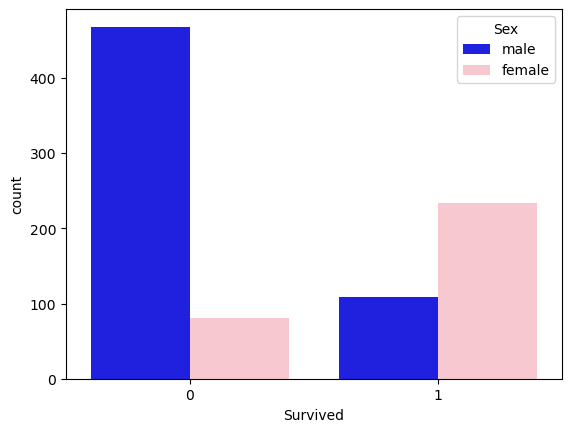

In [6]:
#breakdown of who survived by sex
sns.countplot(x='Survived', hue='Sex', data=titanic , palette=['blue','pink'])

<Axes: xlabel='Survived', ylabel='count'>

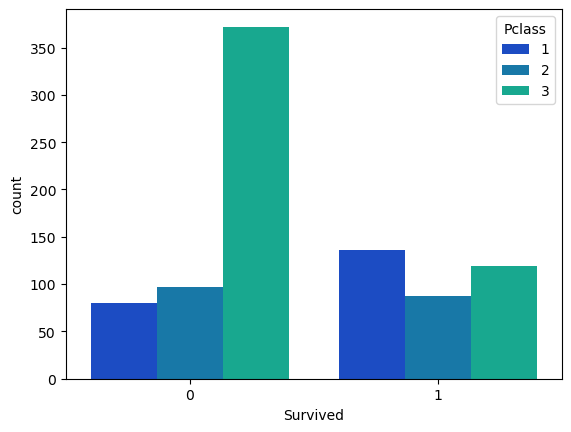

In [7]:
#survival by class 1=Upperclass 2=MiddleClass 3=Lowerclass
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='winter')

<Axes: ylabel='Frequency'>

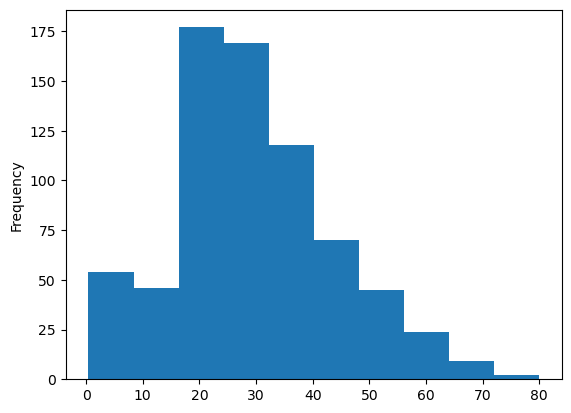

In [8]:
#See age groupsthat boarded the ship
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

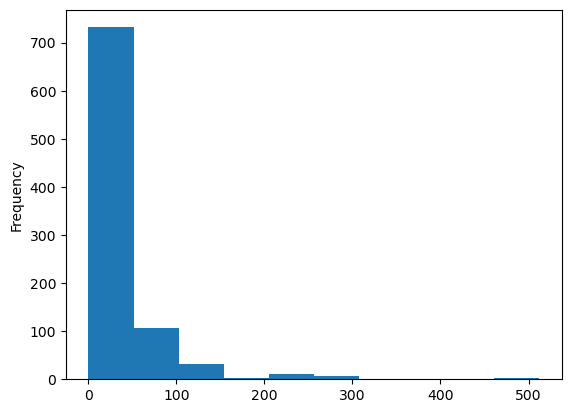

In [9]:
#Range for fare prices
titanic['Fare'].plot.hist()

<Axes: xlabel='Pclass', ylabel='Age'>

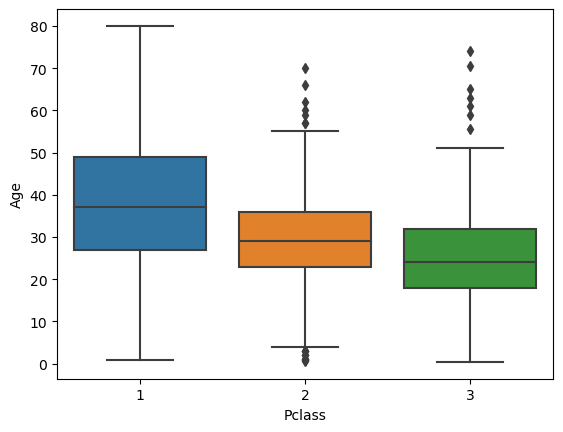

In [10]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [11]:
#see which columns can be dropped by using null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#drop Cabin because the data set is 821 lines and this has 687 null values
titanic.drop('Cabin', axis=1, inplace=True)

In [13]:
titanic.dropna(inplace=True)

In [14]:
#see which columns can be dropped by using null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#start binary process by changing the sex form male and female to 0 & 1
pd.get_dummies(titanic['Sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
#drop first column as it will duplicate 
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
# #embark from the different ports C=Cherbourg, Q=Queenstown, S=Southhampton
embark=pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
Pclass=pd.get_dummies(titanic["Pclass"])
Pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [20]:
titanic.columns=titanic.columns.astype(str)

In [21]:
#concatanate the headers
titanic=pd.concat([titanic, sex,embark,Pclass], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1


In [22]:
#drop columns
titanic.drop(['Name','PassengerId','Pclass', 'Ticket', 'Sex','Embarked'], axis=1, inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [23]:
titanic.rename(columns={"male" : "Sex"})

,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,0,1,0,0,0,1
886,0,27.0,0,0,13.0000,1,0,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,0,1,1,0,0
889,1,26.0,0,0,30.0000,1,1,0,0,1,0,0
